# Морфология 1

Здесь мы познакомимся с двумя мофрологическими анализоторами: pymorphy и mystem.

In [1]:
sample_text = u'Гло́кая ку́здра ште́ко будлану́ла бо́кра и курдя́чит бокрёнка'

### 1. MyStem

In [2]:
from pymystem3 import Mystem
# инициализация собственно инициализатора
mystem_analyzer = Mystem(entire_input=False, disambiguation=False)
# entire_output - сохранение всего входа (напр. пробелов)
# disambiguation - снятие омонимии

Две основные функции Mystem:
- Проводить мофрологический анализ
- Приводить начальные формы для слов в тексте

In [3]:
mystem_result = mystem_analyzer.analyze(sample_text)
mystem_lemmas = mystem_analyzer.lemmatize(sample_text)

In [4]:
# Посмотрим, что у нас получилось при лемматизации 
# (да, чтобы вывести юникодные строки на втором питоне приходится так извращаться)
print(sample_text)
for word in mystem_lemmas:    
    print(word, end=' ')

Гло́кая ку́здра ште́ко будлану́ла бо́кра и курдя́чит бокрёнка
глокая куздра штеко будлануть бокра и курдячить бокренка 

In [5]:
# Ну и результат морфологического анализа
# выведены всевозможные разборы, чтобы оценить масшатбы
for word in mystem_result:
    print(word['text'])
    for res in word['analysis']:
        print('\t', repr(res))

Гло́кая
	 {'lex': 'глокая', 'wt': 0.3605448292, 'qual': 'bastard', 'gr': 'S,ед,жен,неод=им'}
	 {'lex': 'глокать', 'wt': 0.3605448292, 'qual': 'bastard', 'gr': 'V,несов=непрош,деепр,пе'}
	 {'lex': 'глокая', 'wt': 0.1038369108, 'qual': 'bastard', 'gr': 'S,жен,од=им,ед'}
	 {'lex': 'глокай', 'wt': 0.09304979929, 'qual': 'bastard', 'gr': 'S,муж,неод=род,ед'}
	 {'lex': 'глокать', 'wt': 0.03306575604, 'qual': 'bastard', 'gr': 'V,несов,нп=непрош,деепр'}
	 {'lex': 'глокий', 'wt': 0.01624943977, 'qual': 'bastard', 'gr': 'A=им,ед,полн,жен'}
	 {'lex': 'глокать', 'wt': 0.01512198266, 'qual': 'bastard', 'gr': 'V,несов,пе=непрош,деепр'}
	 {'lex': 'глокий', 'wt': 0.01077529943, 'qual': 'bastard', 'gr': 'A=им,ед,полн,жен'}
	 {'lex': 'глокать', 'wt': 0.006811153662, 'qual': 'bastard', 'gr': 'V,нп=непрош,деепр,несов'}
ку́здра
	 {'lex': 'куздра', 'wt': 0.6292693823, 'qual': 'bastard', 'gr': 'S,ед,жен,неод=им'}
	 {'lex': 'куздра', 'wt': 0.3707306177, 'qual': 'bastard', 'gr': 'S,гео,жен,неод=им,ед'}
ште́ко


Создадим теперь анализатор со снятием омонимии

In [6]:
mystem_analyzer2 = Mystem(entire_input=False, disambiguation=True)

In [7]:
mystem_result2 = mystem_analyzer2.analyze(sample_text)
mystem_lemmas2 = mystem_analyzer2.lemmatize(sample_text)

In [8]:
print(sample_text)
for (word, word2) in zip(mystem_lemmas, mystem_lemmas2):    
    print(word, word2)

Гло́кая ку́здра ште́ко будлану́ла бо́кра и курдя́чит бокрёнка
глокая глокай
куздра куздра
штеко штеко
будлануть будланул
бокра бокра
и и
курдячить курдячить
бокренка бокренок


In [9]:
for word in mystem_result2:
    print(word['text'])
    for res in word['analysis']:
        print('\t', repr(res))

Гло́кая
	 {'lex': 'глокай', 'wt': 0.09304979929, 'qual': 'bastard', 'gr': 'S,муж,неод=род,ед'}
ку́здра
	 {'lex': 'куздра', 'wt': 0.6292693823, 'qual': 'bastard', 'gr': 'S,ед,жен,неод=им'}
ште́ко
	 {'lex': 'штеко', 'wt': 0.2574119755, 'qual': 'bastard', 'gr': 'ADV='}
будлану́ла
	 {'lex': 'будланул', 'wt': 0.03753661836, 'qual': 'bastard', 'gr': 'S,муж,од=(вин,ед|род,ед)'}
бо́кра
	 {'lex': 'бокра', 'wt': 0.8898982327, 'qual': 'bastard', 'gr': 'S,ед,жен,неод=им'}
и
	 {'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}
курдя́чит
	 {'lex': 'курдячить', 'wt': 0.5, 'qual': 'bastard', 'gr': 'V,обсц,сов,пе=непрош,ед,изъяв,3-л'}
бокрёнка
	 {'lex': 'бокренок', 'wt': 0.165166425, 'qual': 'bastard', 'gr': 'S,муж,неод=род,ед'}


Проблемы MyStem

In [10]:
disambiguations = [ 'Александра Иванова пошла в кино',
                    'Александра Иванова видели в кино с кем-то',
                    'Воробьев сегодня встал не с той ноги']

disambiguation_results = []
for dis in disambiguations:
    disambiguation_results.append(mystem_analyzer2.lemmatize(dis))
    
for res in disambiguation_results:
    for word in res:
        print(word, end=' ')
    print(' ')

александра иванов пойти в кино  
александра иванов видеть в кино с кто-то  
воробей сегодня вставать не с тот нога  


#### Задание
Для того, чтобы наиграться с MyStem, предлагается написать методы, которые:
- находит топ n лексем
- находит слова с наибольшей и наименьшей энтропией

Энтропия
$$
H(x) = - \sum\limits_{i} p_i \log_2{p_i}
$$

In [13]:
from collections import Counter
from tqdm import tqdm_notebook
import math

def get_top_words(text, n=None):
    '''
    :param text: input text in russian
    :param n: number of most common words
    :return: list of most common lexemas
    '''
    counter = Counter(mystem_analyzer2.lemmatize(text))        
    return [word for word, count in counter.most_common(n)]
        
    
def get_entropy(text):
    """
    :param text: input text in russian
    :return: list of pairs (word, entropy)
    """
    output = []
    
    for result in mystem_analyzer2.analyze(text):
        analyze = result['analysis']
        word = result['text']
        entropy = -1*sum([lex['wt']*math.log2(lex['wt']) for lex in analyze])
        output.append((word, entropy))
        
    return output

def get_max_entropy_words(text, n):
    '''
    :param text: input text in russian
    :param n: number of most words with maximun entropy
    :return: list of words with entropies
    '''
    words_entropy = get_entropy(text)
    return sorted(words_entropy, key=lambda x: x[1], reverse=True)[:n]

def get_min_entropy_words(text, n):
    '''
    :param text: input text in russian
    :param n: number of most words with minimum entropy
    :return: list of words with entropies
    '''
    words_entropy = get_entropy(text)
    
    return sorted(words_entropy, key=lambda x: x[1], reverse=False)[:n]

In [14]:
get_max_entropy_words(sample_text, -1), get_min_entropy_words(sample_text, -1)

([('ште́ко', 0.5039737586652117),
  ('курдя́чит', 0.5),
  ('бокрёнка', 0.4291036355252055),
  ('ку́здра', 0.42050948242931024),
  ('Гло́кая', 0.31877494813522017),
  ('будлану́ла', 0.1777568147811354),
  ('бо́кра', 0.14975895672485304)],
 [('и', 3.3130101315469967e-05),
  ('бо́кра', 0.14975895672485304),
  ('будлану́ла', 0.1777568147811354),
  ('Гло́кая', 0.31877494813522017),
  ('ку́здра', 0.42050948242931024),
  ('бокрёнка', 0.4291036355252055),
  ('курдя́чит', 0.5)])

### 2. Pymorphy

In [15]:
# создание анализатора
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [16]:
# sample_text = u'Глокая куздра штеко будланула бокра и кудрячит бокренка'
# в отличие от mystem работает пословно
pymorphy_results = map(lambda x: morph.parse(x), sample_text.split())

In [17]:
# собираем результаты и выводим 
for word_result in pymorphy_results:
    print(word_result[0].word)
    for res in word_result:
        print('\t', res.normal_form, res.tag, res.score)

гло́кая
	 гло́кай NOUN,anim,masc,Name sing,gent 0.3333423559982676
	 гло́кай NOUN,anim,masc,Name sing,accs 0.3333423559982676
	 гло́кий ADJF femn,sing,nomn 0.3083315288003464
	 гло́кий NOUN,anim,femn,Sgtm,Surn sing,nomn 0.021410783889129488
	 гло́кать GRND,impf,intr pres 0.0035729753139887395
ку́здра
	 ку́здра NOUN,inan,femn,Sgtm,Fixd,Abbr,Geox sing,nomn 0.15000000000000002
	 ку́здра NOUN,inan,femn,Sgtm,Fixd,Abbr,Geox sing,gent 0.15000000000000002
	 ку́здра NOUN,inan,femn,Sgtm,Fixd,Abbr,Geox sing,datv 0.15000000000000002
	 ку́здра NOUN,inan,femn,Sgtm,Fixd,Abbr,Geox sing,accs 0.15000000000000002
	 ку́здра NOUN,inan,femn,Sgtm,Fixd,Abbr,Geox sing,ablt 0.15000000000000002
	 ку́здра NOUN,inan,femn,Sgtm,Fixd,Abbr,Geox sing,loct 0.15000000000000002
	 ку́здра NOUN,inan,femn,Sgtm sing,nomn 0.05
	 ку́здра NOUN,inan,femn,Sgtm,Geox sing,nomn 0.05
ште́ко
	 ште́ко NOUN,anim,GNdr,Ms-f,Fixd,Surn sing,nomn 0.07995028997514501
	 ште́ко NOUN,anim,GNdr,Ms-f,Fixd,Surn sing,gent 0.07995028997514501
	 ште́ко

В отличие от mystem можно получать лексему и склонять слова

In [18]:
bokr = morph.parse(u'градус')[0]
for form in bokr.lexeme:
    print(form.word, form.tag)

градус NOUN,inan,masc sing,nomn
градуса NOUN,inan,masc sing,gent
градусу NOUN,inan,masc sing,datv
градус NOUN,inan,masc sing,accs
градусом NOUN,inan,masc sing,ablt
градусе NOUN,inan,masc sing,loct
градусы NOUN,inan,masc plur,nomn
градусов NOUN,inan,masc plur,gent
градусам NOUN,inan,masc plur,datv
градусы NOUN,inan,masc plur,accs
градусами NOUN,inan,masc plur,ablt
градусах NOUN,inan,masc plur,loct


In [19]:
print(bokr.inflect({'loct'}).word,)
print(bokr.make_agree_with_number(1).word,)
print(bokr.make_agree_with_number(2).word,)
print(bokr.make_agree_with_number(5).word)

градусе
градус
градуса
градусов


#### Задание 
С помощью pymorphy на тексте получить:
- Распределение по частям речи
- Для части речи вывести топ n лексем

In [133]:
def get_pos_distribution(tokens, lexemas=None):
    '''
    :param: tokens: input text in russian
    :param: lexemas: list of interested pos, if None - all are interesting 
    :return: dict of pos - probability
    
    Maybe here it is possible not to count, but count probs
    '''
    counter = dict()
    pymorphy_results = map(lambda x: morph.parse(x), tokens)
    total_score = 0
    
    for word_result in pymorphy_results:
        for result in word_result:
            score = result.score
            total_score += score
            counter[str(result.tag.POS)] = counter.get(str(result.tag.POS), 0) + score
          
    result = dict()
        
    for key, value in counter.items():
        result[key] = (1.0 * value) / total_score
    
    return result
    

def get_top_pos_words(tokens, pos, n):
    '''
    :param tokens: input text in russian
    :param pos: part of speech 
    :param n: number of most common words
    :return: list of most common lexemas with selected pos
    '''
    
    # counter contains objects like (lexema, score)
    # if lemma appears in text more than once, then score sums
    # There are a lot of ways to assign score to word or lexema
    # as for example for each word we can take only most probable
    # lemma, and count 1
    # on the other hand we can say that if there is a distribution
    # of lexemas there is prob to choose some word, then we can score it
    counter = dict()
    
    pymorphy_results = map(lambda x: morph.parse(x), tokens)
    
    for word_result in pymorphy_results:
        for result in word_result:
            if pos in result.tag:
                counter[result.normal_form] = counter.get(result.normal_form, 0) + result.score
                
    counter_list = [(lemma, score) for lemma, score in counter.items()]
    return sorted(counter_list, reverse=True, key=lambda x: x[1])[:n]

In [137]:
from nltk.tokenize import TweetTokenizer

sample_tokens = TweetTokenizer().tokenize(sample_text)

In [140]:
get_pos_distribution(sample_text.split())

{'NOUN': 0.5868262195883333,
 'ADJF': 0.0401984821270258,
 'GRND': 0.000446622360870953,
 'ADVB': 0.002622386013696776,
 'ADJS': 0.021238911850659212,
 'VERB': 0.22388575327778834,
 'CONJ': 0.12470899970899962,
 'INTJ': 5.450005450005447e-05,
 'PRCL': 1.8125018125018115e-05}

In [141]:
get_top_pos_words(sample_text.split(), "NOUN", -1)

[('ку́здра', 1.0000000000000002),
 ('бокрёнок', 0.9999999999999999),
 ('ште́ко', 0.95940347970174),
 ('гло́кай', 0.6666847119965352),
 ('бо́кр', 0.4444444444444445),
 ('бо́кра', 0.4444444444444445),
 ('будлану́л', 0.11235955056179775),
 ('курдя́чит', 0.04411764705882353),
 ('гло́кий', 0.021410783889129488)]

In [91]:
text = """
Художественный стиль – это особый стиль речи, который получил широкое распространение как в мировой художественной литературе в целом, так и в копирайтинге в частности. Он характеризуется высокой эмоциональностью, прямой речью, богатством красок, эпитетов и метафор, а также призван воздействовать на воображение читателя и выступает в роли спускового крючка для его фантазии. Итак, сегодня мы подробно и на наглядных примерах рассматриваем художественный стиль текстов и его применение в копирайтинге.
Особенности художественного стиля

Как уже было сказано выше, художественный стиль наиболее часто используется в художественной литературе: романах, новеллах, рассказах, повестях и прочих литературных жанрах. Этому стилю не присущи оценочные суждения, сухость и официальность, которые свойственны научному и официально-деловому стилям. Вместо этого для него характеры повествование и передача мельчайших деталей, чтобы сформировать в воображении читателя филигранную форму передаваемой мысли.

В контексте копирайтинга художественный стиль нашел новое воплощение в гипнотических текстах, которым на этом блоге посвящен целый раздел «Гипнотический копирайтинг». Именно элементы художественного стиля позволяют текстам воздействовать на лимбическую систему головного мозга читателя и запускать необходимые автору механизмы, благодаря которым достигается порой весьма любопытный эффект. Например, читатель не может оторваться от романа или у него возникает сексуальное влечение, а также другие реакции, о которых мы еще будем вести речь в последующих статьях.
Элементы художественного стиля

В любом художественном тексте присутствуют элементы, которые характерны для стиля его изложения. Для художественного стиля наиболее характерны:
"""

In [143]:
get_pos_distribution(TweetTokenizer().tokenize(text))

{'ADJF': 0.17302737760940082,
 'NOUN': 0.3089927448997188,
 'None': 0.138889061397921,
 'PRCL': 0.01792835956974813,
 'NPRO': 0.0397040413784322,
 'VERB': 0.05392297835142398,
 'CONJ': 0.0799337024573365,
 'ADVB': 0.03187930282363131,
 'PREP': 0.09965978251393587,
 'INTJ': 9.53969438858863e-05,
 'PRTS': 0.010361564457022484,
 'ADJS': 0.018601209611819807,
 'INFN': 0.02354500146660888,
 'GRND': 3.630956890831364e-05,
 'COMP': 0.0014390375016616538,
 'PRTF': 0.0019841294485417288}

In [144]:
import matplotlib.pyplot as plt

def plot_distribution(counts, **kwargs):
    """
    :param counts: dict of pairs word, score
    :return ax: pyplot.axes object
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, **kwargs)

    scores_list = list(counts.items())    
    scores_list = sorted(scores_list, reverse=True, key=lambda x: x[1])
    words, scores = list(zip(*scores_list))
    
    ax.bar(list(range(len(scores))), scores)    
    
    print(words)
    ax.set_xticks(list(range(len(words))))
    ax.set_xticklabels(words, rotation="vertical")
    
    return ax

('None', 'NOUN', 'PREP', 'CONJ', 'ADJF', 'ADVB', 'NPRO', 'PRCL', 'INTJ', 'VERB')


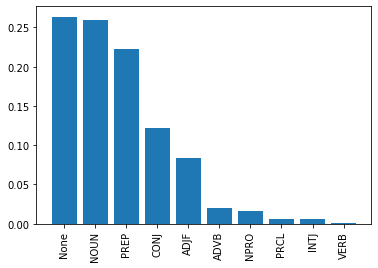

In [145]:
plot_distribution(get_pos_distribution(text))